***1. Loading the Breast Cancer Dataset***

In [1]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC

The load_breast_cancer() function loads the Wisconsin Breast Cancer dataset, which is a commonly used dataset for binary classification problems.

The dataset contains 569 samples with 30 features each, and the target variable (y) is binary:

   -0 → Malignant (cancerous)

   -1 → Benign (non-cancerous)

In [2]:
cancer = load_breast_cancer()
print(cancer.feature_names)
print(cancer.target)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0

This prints the names of the 30 features and the corresponding target labels.

***2. Selecting Features for Training***

In [3]:
X = cancer.data[:,:2] # Selecting only the first two features
X.shape

(569, 2)

Instead of using all 30 features, only the first two features (**mean radius** and **mean texture**) are selected for visualization.

This is done because visualizing decision boundaries in higher dimensions is difficult.

In [4]:
y = cancer.target # Target variable

This assigns the target labels of the breast cancer dataset to the variable y.

cancer.target is a NumPy array containing the labels for each of the 569 samples in the dataset.

Why is y = cancer.target important?

-- In supervised learning, the model needs features (X) and labels (y).

-- Here, X contains the first two features (e.g., mean radius and mean texture), and y contains the actual classification (malignant or benign).

-- The SVM classifier is trained to learn the relationship between X (features) and y (labels), so it can classify new, unseen data.



***3. Training the SVM Classifier***

In [5]:
svm = SVC(kernel='rbf', gamma=0.5, C=1.0)
svm.fit(X, y)

SVC(gamma=0.5)

Here, we train an SVM classifier using a Radial Basis Function (RBF) kernel.

Key parameters:

--kernel='rbf': The RBF kernel is used to map non-linearly separable data into a higher-dimensional space.

--gamma=0.5: Controls how much influence a single training example has. Higher values mean more influence.

--C=1.0: The regularization parameter that controls how much the model tries to fit the data. A high C means the model tries to fit the training data more closely.

***4. Visualizing the Decision Boundary***

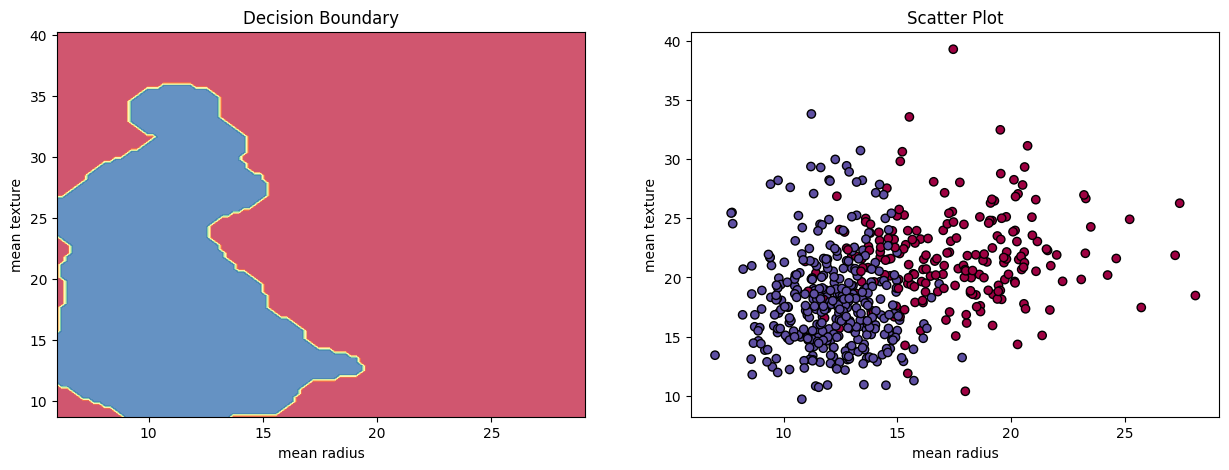

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot decision boundary
DecisionBoundaryDisplay.from_estimator(svm, X, response_method='predict', cmap=plt.cm.Spectral, alpha=0.8, ax=axs[0])
# axs[0].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, edgecolors='k')
axs[0].set_xlabel(cancer.feature_names[0])
axs[0].set_ylabel(cancer.feature_names[1])
axs[0].set_title('Decision Boundary')

# Plot scatter plot
axs[1].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, edgecolors='k')
axs[1].set_xlabel(cancer.feature_names[0])
axs[1].set_ylabel(cancer.feature_names[1])
axs[1].set_title('Scatter Plot')

plt.show()

This creates two subplots:

1. Decision Boundary Plot: Uses DecisionBoundaryDisplay.from_estimator() to plot the boundary learned by the SVM.
2. Scatter Plot: Shows the actual data points, color-coded by their class.

Why this visualization?

The decision boundary separates the benign and malignant samples.
SVM with RBF kernel works well even when the data is not linearly separable.

***5. Final Visualization***

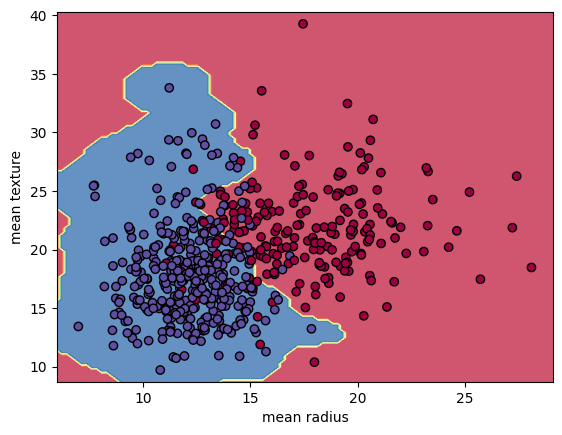

In [7]:
DecisionBoundaryDisplay.from_estimator(svm, X, response_method='predict', cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, edgecolors='k')
plt.xlabel(cancer.feature_names[0])
plt.ylabel(cancer.feature_names[1])
plt.show()

This final plot again visualizes the decision boundary with the data points.

1. **SVM for Classification**: Support Vector Machines are powerful classifiers that work well with high-dimensional data.

2. **Kernel Trick**: The RBF kernel allows SVM to handle non-linearly separable data.

3. **Regularization (C) and gamma**:

   --C controls the tradeoff between maximizing margin and minimizing classification error.

     --gamma determines the influence of individual training points.

4. Feature Selection for Visualization:

  --Only two features are used to visualize the decision boundary.

  --In real-world applications, dimensionality reduction (PCA, t-SNE) is used to visualize high-dimensional data.

5. **Model Evaluation**: The performance of an SVM model should be evaluated using cross-validation and metrics like accuracy, precision, recall, and F1-score.